# Camera Calibration

In [3]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

nx = 9
ny = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)

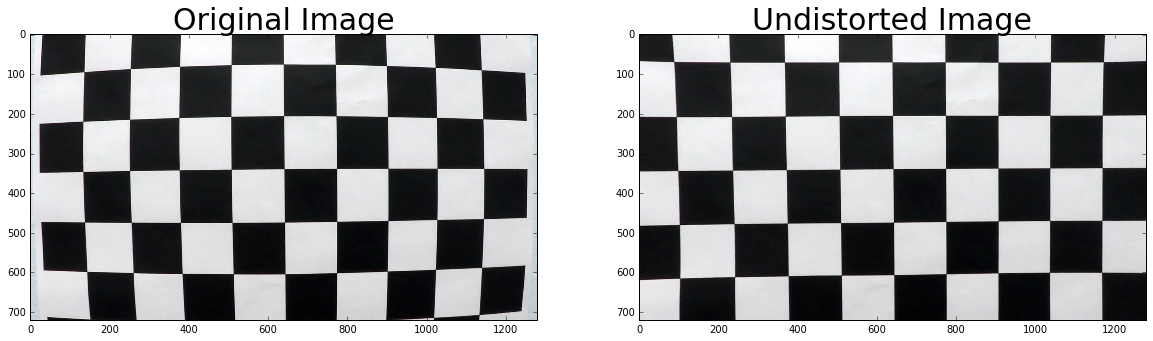

In [7]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite("output_images/calibration1_undist.jpg",dst)
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

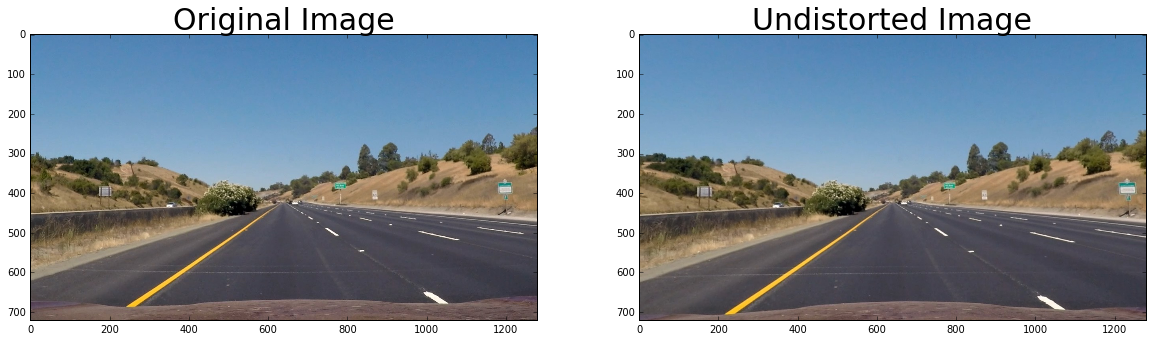

In [8]:
image = cv2.imread("test_images/straight_lines1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_size=(image.shape[1],image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(image, mtx, dist, None, mtx)

dst_bgr = cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
cv2.imwrite("output_images/straight_lines1_undist.jpg",dst_bgr)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

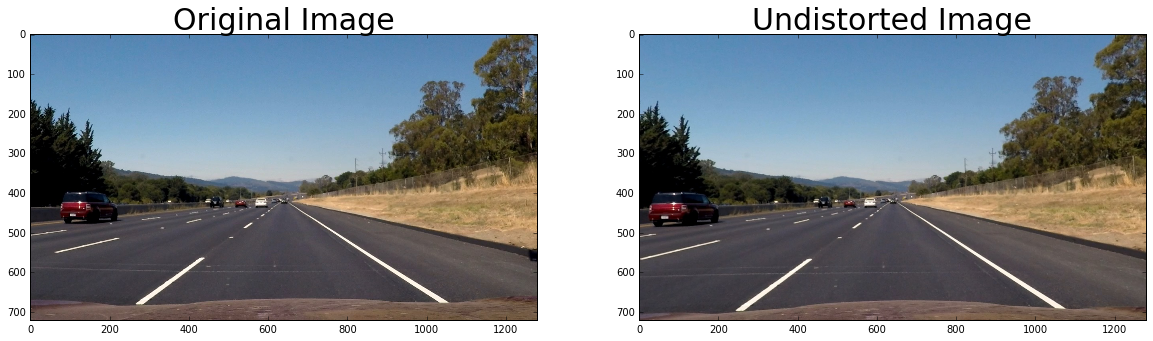

In [6]:
image =cv2.imread("test_images/straight_lines2.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_size=(image.shape[1],image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(image, mtx, dist, None, mtx)

dst_bgr = cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
cv2.imwrite("output_images/straight_lines2_undist.jpg",dst_bgr)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [18]:
def undist_img_test(img_title,objpoints,imgpoints):
    img = cv2.imread(img_title)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_size=(img.shape[1],img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    dst_bgr =cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
    cv2.imwrite("output_images/test"+str(i+1)+"_undist.jpg",dst_bgr)
    
images = glob.glob('test_images/test*.jpg')
for i,img_title in enumerate(images):    
    undist_img_test(img_title,objpoints,imgpoints)